# Regularization

## DataSet

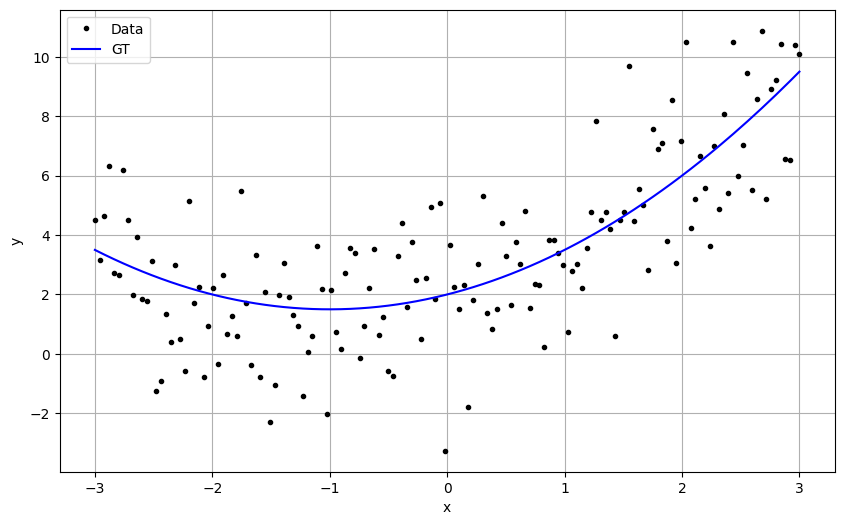

In [1]:
#@title { vertical-output: true}

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
np.random.seed(42)

# Generate synthetic data with noise
m = 150
x = np.linspace(-3, 3, m).reshape(m, 1)
y_gt = 0.5 * x**2 + x + 2
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1) * 2.0  # Higher noise

# Plot data and models
plt.figure(figsize=(10, 6))
plt.plot(x, y, "k.", label="Data")
plt.plot(x, y_gt, "b-", label="GT")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## MLE

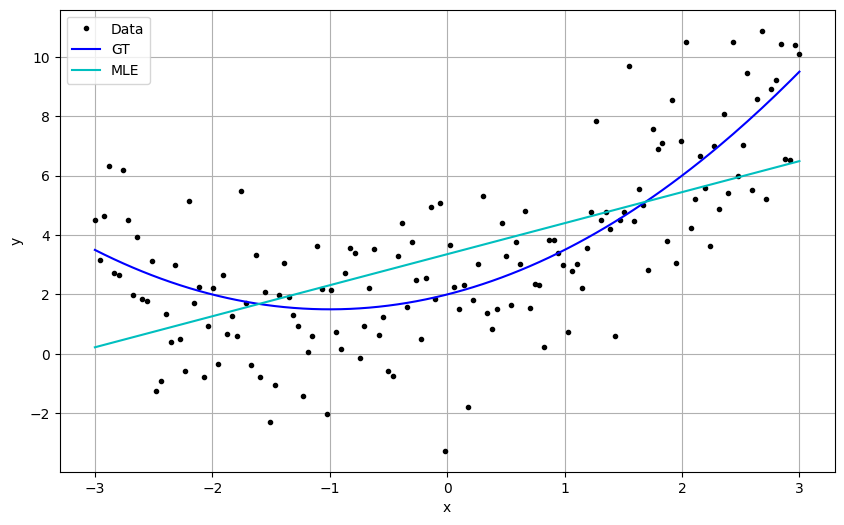

In [2]:
#@title { vertical-output: true}

mle = LinearRegression()

# 모델을 데이터(x, y)에 학습시킵니다.
mle.fit(x, y)
# 학습된 모델을 사용하여 x에 대한 예측값 y_mle를 계산합니다.
y_mle = mle.predict(x)

# Plot data and models
plt.figure(figsize=(10, 6))
plt.plot(x, y, "k.", label="Data")
plt.plot(x, y_gt, "b-", label="GT")
plt.plot(x, y_mle, "c-", label="MLE")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Ridge (L2)

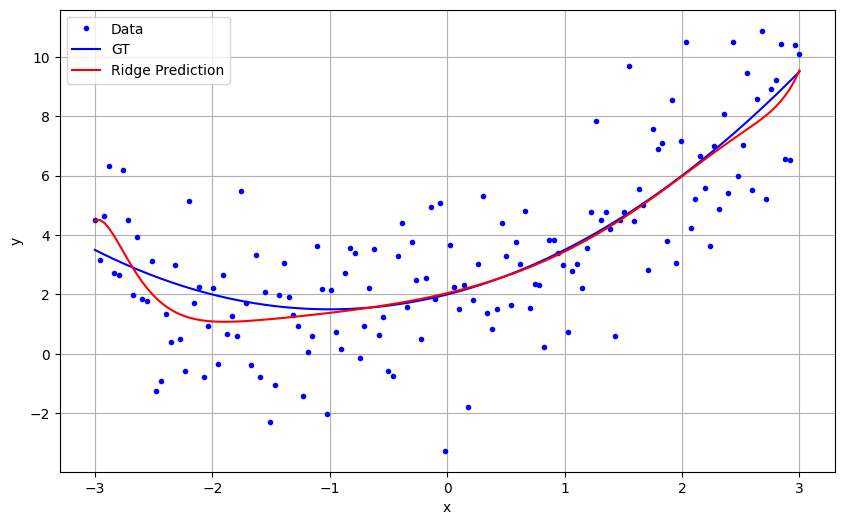

Ridge coefficients:
[ 1.63960624  0.99724315  0.95914357  0.0548603  -0.04096512 -0.17215225
 -0.37544058  0.04413037 -0.45909016  0.26293556 -0.42519357  0.33422907
 -0.29627748  0.26023691 -0.07828242  0.08955854  0.21763592 -0.12736794
  0.57523222 -0.35181125]
R² score (MLE): 0.610


In [4]:
#@title { vertical-output: true}
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

ridge_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=20, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

ridge_reg.fit(x.reshape(-1, 1), y)
y_ridge = ridge_reg.predict(x.reshape(-1, 1))

# Plot data and models
plt.figure(figsize=(10, 6))
plt.plot(x, y, "b.", label="Data")
plt.plot(x, y_gt, "b-", label="GT")
plt.plot(x, y_ridge, "r-", label="Ridge Prediction")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Print coefficients
ridge_coef = ridge_reg.named_steps['ridge'].coef_

print("Ridge coefficients:")
print(ridge_coef)
print(f"R² score (MLE): {r2_score(y, y_ridge):.3f}")

## Lasso (L1)

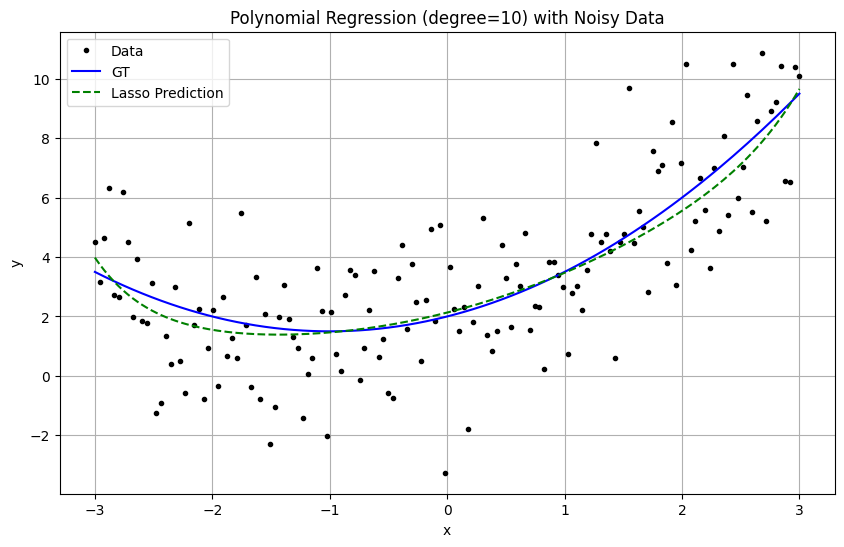


Lasso coefficients: [ 1.74989786  0.90345278  0.          0.04574585 -0.          0.
 -0.          0.34790559 -0.04188836  0.        ]


In [5]:
#@title { vertical-output: true}
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

lasso_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=10, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1, max_iter=10000)) # 수렴을 위해 max_iter 증가
])

lasso_reg.fit(x.reshape(-1, 1), y)
y_lasso = lasso_reg.predict(x.reshape(-1, 1))

# Plot data and models
plt.figure(figsize=(10, 6))
plt.plot(x, y, "k.", label="Data")
plt.plot(x, y_gt, "b-", label="GT")
plt.plot(x, y_lasso, "g--", label="Lasso Prediction")
plt.legend()
plt.title("Polynomial Regression (degree=10) with Noisy Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Print coefficients
lasso_coef = lasso_reg.named_steps['lasso'].coef_
print(f'\nLasso coefficients: {lasso_coef}')

## Comparison

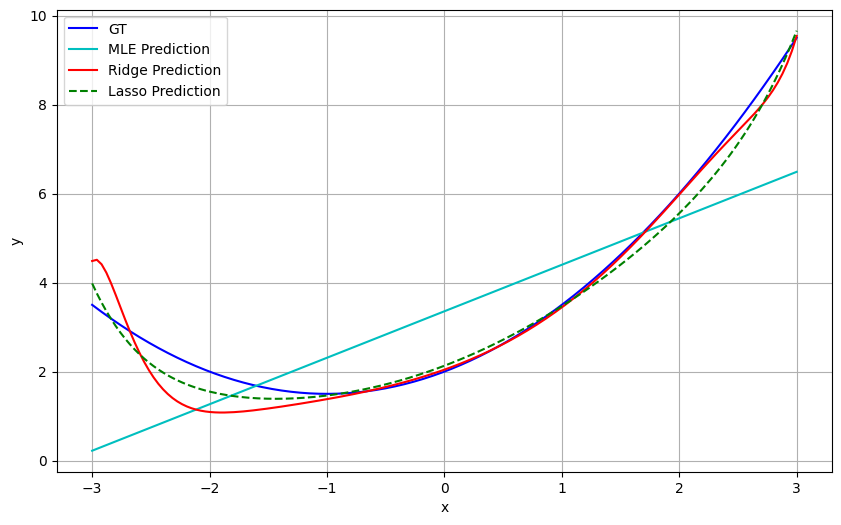

In [7]:
#@title { vertical-output: true}
plt.figure(figsize=(10, 6))
plt.plot(x, y_gt, "b-", label="GT")
plt.plot(x, y_mle, "c-", label="MLE Prediction")
plt.plot(x, y_ridge, "r-", label="Ridge Prediction")
plt.plot(x, y_lasso, "g--", label="Lasso Prediction")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()